In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import scipy.stats as sp
from scipy.stats import norm, binom, poisson, expon
import statistics 
import math

In [2]:
train = pd.read_csv('traincasas.csv')

se tomaran precios menores a 300000 de la tabla de casas como poblacion, y se guardara en s

In [3]:
s=train["SalePrice"][:]
poblacion=s[s<300000]

In [4]:
poblacion

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1345, dtype: int64

el metodo describe() nos da algunas estadisticas de la muestra, la cantidad de datos, el promedio,la desviacion estandar, el minimo, los cuartiles, y el maximo, todo en formato dataframe.

In [5]:
poblacion.describe()  

count      1345.000000
mean     164246.190335
std       52094.670262
min       34900.000000
25%      128000.000000
50%      156000.000000
75%      196000.000000
max      299800.000000
Name: SalePrice, dtype: float64

Para visualizar los cuartiles se puede hacer un boxplot

C:\Users\kain\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

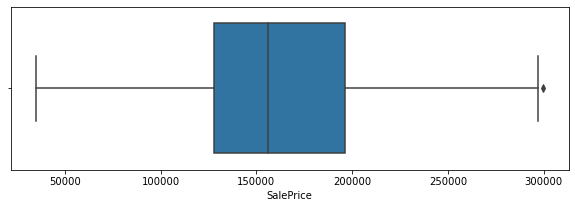

In [6]:
fig=plt.figure(figsize=[10,3])
sn.boxplot(poblacion)

El coeficiente de asimetria se obtienen con la libreria de scipy, y es el siguiente

In [7]:
sp.skew(poblacion)

0.4249733372216919

lo que indica que la grafica es asimetrica a la derecha

mientras que la curtosis es

In [8]:
sp.kurtosis(poblacion)  

-0.31352757239911533

este valor de la curtosis indica que la distribucion es platicurtica

para mayor comodidad se acomodarantodos los datos en intervalos de clase, 50 bins por ejemplo,
asi los datos agrupados en bins queda como sigue.

In [10]:
bins=poblacion.value_counts(bins=50, sort=False)
bins

(34635.099, 40198.0]     5
(40198.0, 45496.0]       0
(45496.0, 50794.0]       0
(50794.0, 56092.0]       5
(56092.0, 61390.0]       5
(61390.0, 66688.0]       3
(66688.0, 71986.0]       4
(71986.0, 77284.0]       6
(77284.0, 82582.0]      21
(82582.0, 87880.0]      22
(87880.0, 93178.0]      23
(93178.0, 98476.0]      17
(98476.0, 103774.0]     21
(103774.0, 109072.0]    36
(109072.0, 114370.0]    39
(114370.0, 119668.0]    52
(119668.0, 124966.0]    42
(124966.0, 130264.0]    76
(130264.0, 135562.0]    62
(135562.0, 140860.0]    71
(140860.0, 146158.0]    68
(146158.0, 151456.0]    50
(151456.0, 156754.0]    46
(156754.0, 162052.0]    51
(162052.0, 167350.0]    40
(167350.0, 172648.0]    42
(172648.0, 177946.0]    54
(177946.0, 183244.0]    53
(183244.0, 188542.0]    42
(188542.0, 193840.0]    38
(193840.0, 199138.0]    29
(199138.0, 204436.0]    28
(204436.0, 209734.0]    24
(209734.0, 215032.0]    33
(215032.0, 220330.0]    17
(220330.0, 225628.0]    22
(225628.0, 230926.0]    25
(

Se crea un histograma de los datos precios con 50 bins para poder visualisar como es la distribucion 
los datos.

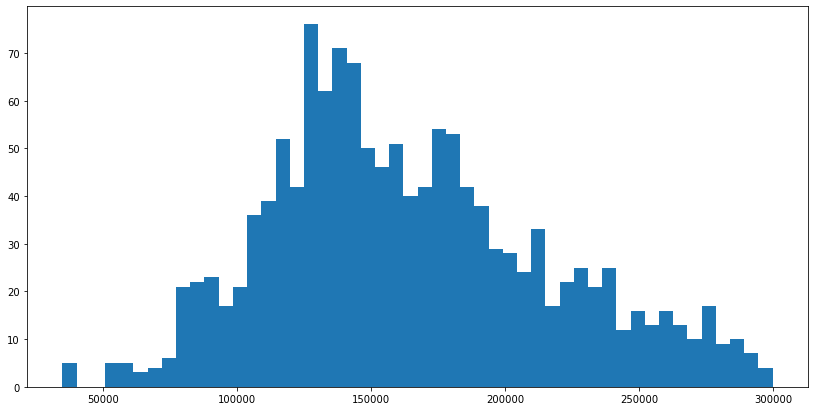

In [11]:
fig=plt.figure(figsize=[14,7])    # esto es para cambiar las dimensiones de la figura
plt.hist(poblacion, bins=50)     # para crear el histograma, dando los datos si agrupar y la cantidad de bins deseados
plt.show()

ahora se crea el histograma de frec relativa

In [12]:
# se divide cada frecuencia de clase entre la cantidad de datos 
rel=(poblacion.value_counts(bins=50, sort=False))/1345

# para la marca de clase se usara el punto medio de cada intervalo de clase, se usara un for para
# extraer cada marca de clase y convertirlo a string, que se usara para el diagrama de barras

mcs=[]   #lista para las marcas de clase
for i in range(50):               # de 0 a 50 por que son 50 bins
    mc=bins.index[i].mid             #aqui se extrae la marca de clase de cada bin
    mcs.append(str(mc))

Asi la grafica de barras se ve como sigue

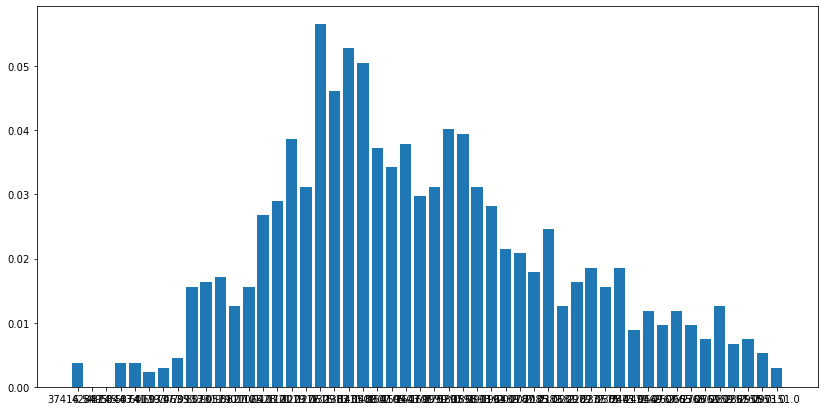

In [13]:
fig=plt.figure(figsize=[14,7])    # esto es para cambiar las dimensiones de la figura
plt.bar(mcs,rel)     # para crear la grafica de barras, dando una serie X y un Y
plt.show()

Ahora se crea la distribucion acumulada de freq relativa, para esto se hace la suma acumulativa de los
valores obtenidos en el objeto rel, que es la freq relativa.

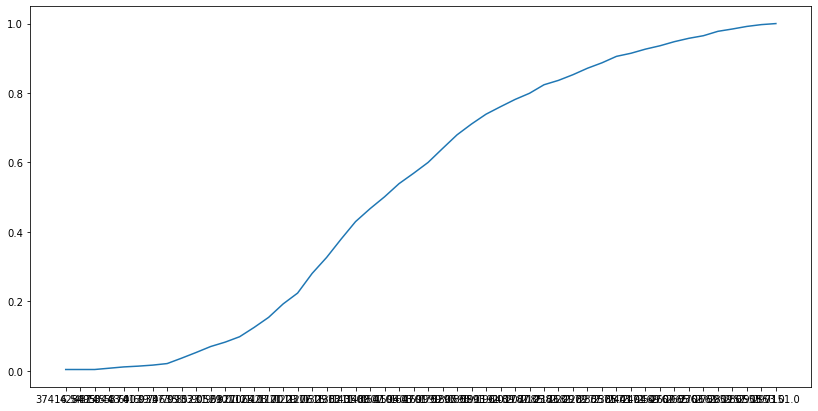

In [15]:
fig=plt.figure(figsize=[14,7])
plt.plot(mcs,rel.cumsum())      # se vuelve a usar mcs las marcas de clase ya creadas
plt.show()

Por ultimo tambien se puede crear una grafica de pastel de las distribuciones relativas dadas en 
porcentaje, cada sector se identifico con su marca de clase respectivo.

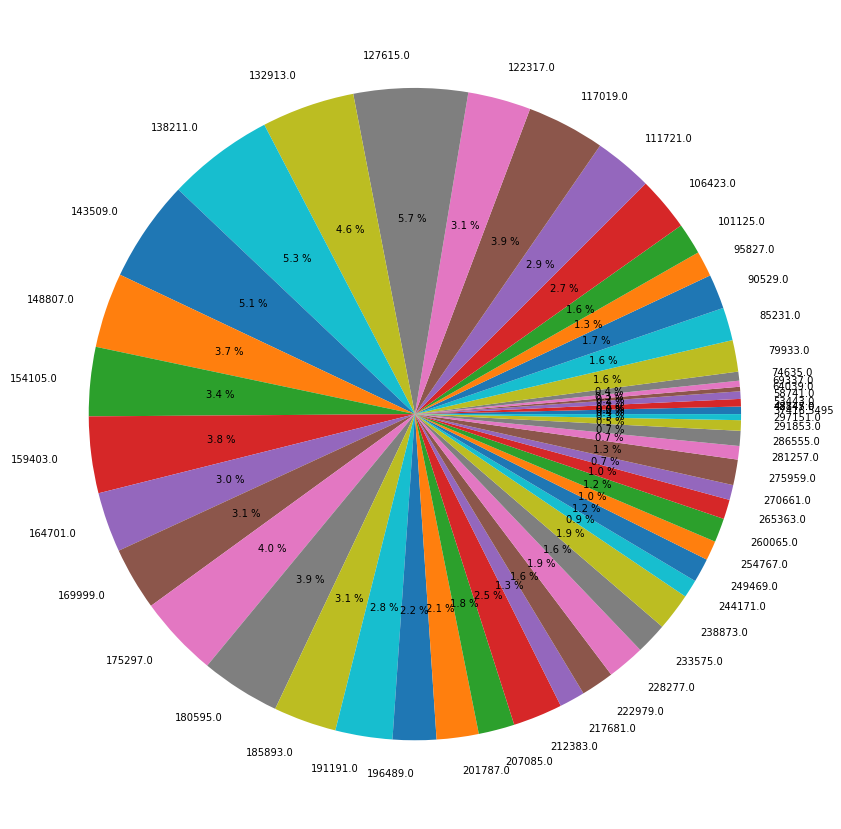

In [22]:
fig=plt.figure(figsize=[15,15])    # esto es para cambiar las dimensiones de la figura
plt.pie(rel, labels=mcs, autopct="%0.1f %%")     # para crear el pie.
plt.show()

INFERENCIA ESTADISTICA

Para hacer infenrencia estadistica se necesita hacer muestreo, se daran algunos metodos de muestreo estadistico y luego se hara infenrencia estadistica, todo es a modo de ejemplo.

para obtener muestras aleatorias se puede hacer con un for y guardarla en una lista de listas

In [4]:
muestreoaleatorio=[]
for i in range(2000):
    muestrasa = poblacion.sample(n=300,replace=True)   #seleccion aleatoria de 300 datos de la muestra con remplazo
    muestreoaleatorio.append(muestrasa)

una  vez que se tienen las muestras, que en este caso son 2000 muestras de 300 datos aleatorios cada una, se puede obtener 
le promedio de cada muestra y luego visualizar como es la distribucion de estas medias, y como se sabe del teorema de limite central la distribucion se comportara aproximadamente como una distribucion normal.

In [5]:
promediosample=[]
for i in range(2000):
     promedio=np.mean(muestreoaleatorio[i])
     promediosample.append(promedio)   

In [6]:
promediosample

[164083.02,
 160846.52,
 167076.03,
 165829.91666666666,
 161336.43666666668,
 167146.69333333333,
 163438.64333333334,
 169887.15333333332,
 168400.57333333333,
 165278.19,
 163620.18333333332,
 161629.89,
 162169.73666666666,
 164596.84666666668,
 169517.66,
 163867.70333333334,
 163001.17666666667,
 165992.19666666666,
 164203.98666666666,
 164108.05333333334,
 164835.68666666668,
 167093.79666666666,
 164474.9,
 161010.70666666667,
 166129.91,
 166770.93333333332,
 160507.36666666667,
 159675.54666666666,
 156769.29666666666,
 165617.28,
 167897.99,
 163717.13666666666,
 162967.10333333333,
 164371.83666666667,
 160454.15,
 166779.66,
 160424.09,
 167074.29333333333,
 166910.37333333332,
 167315.99,
 163843.57333333333,
 160653.54333333333,
 164501.48333333334,
 164674.53666666665,
 165750.37666666668,
 165745.52333333335,
 158968.71333333335,
 168292.47,
 160160.35666666666,
 166127.41666666666,
 163031.00666666665,
 170191.21666666667,
 161090.78333333333,
 166834.87333333332,
 1

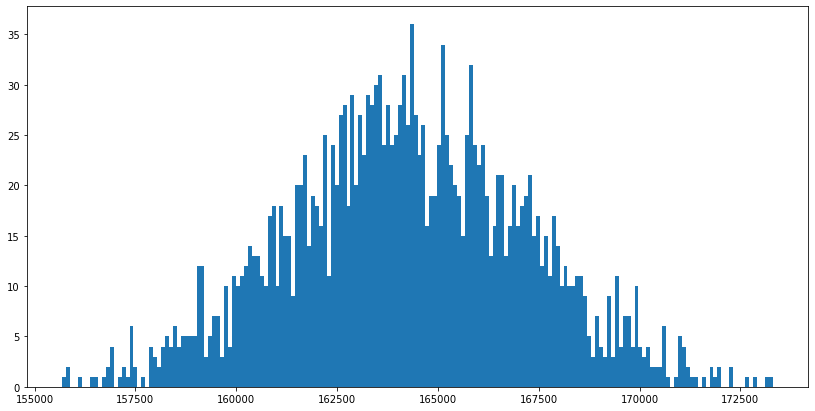

In [7]:
fig=plt.figure(figsize=[14,7])
plt.hist(promediosample, bins=180)  
#plt.plot(promedios)    
plt.show()

como se puede observar graficamente, la distribucion se comporta aproximadamente bien como una distribucion normal.

Tambien se puede hacer un muestreo tomando un porcentaje de la muestra, con remplazo.

In [20]:
porcentaje=poblacion.sample(frac=0.3,replace=True)

In [21]:
porcentaje

1324    147000
1435    174000
1162    129000
903     240000
760     127500
         ...  
257     220000
328     214500
51      114500
947     270000
1341    155000
Name: SalePrice, Length: 404, dtype: int64

y lo mismo que el muestreo aleatorio se puede sacar una distribucion de medias con esta muestra de porcentaje

In [25]:
promedios=[]
for i in range(2000):          # aqui tambien se sacan 2000 medias como en el muestreo anterior
     porcentaje=poblacion.sample(frac=0.3,replace=True)
     promedio=np.mean(porcentaje)
     promedios.append(promedio) 

In [27]:
promedios

[166501.13861386137,
 166364.4306930693,
 159518.96534653465,
 164355.67574257427,
 163688.49504950494,
 161559.36386138614,
 161412.66089108912,
 166437.75742574257,
 162439.04702970298,
 163153.80445544556,
 165403.82673267327,
 158382.70297029702,
 163060.88366336634,
 165134.38861386137,
 163630.650990099,
 166155.48514851485,
 161171.87376237623,
 171624.10643564357,
 167492.78465346535,
 167060.63366336634,
 164541.59158415842,
 164195.599009901,
 162339.84653465348,
 163680.36386138614,
 166967.698019802,
 162929.92574257427,
 163772.051980198,
 164172.05693069307,
 165849.91584158415,
 162813.42574257427,
 162573.10396039605,
 162503.20297029702,
 163833.69554455444,
 161710.948019802,
 165595.16089108912,
 163596.47524752477,
 167623.099009901,
 159476.33663366336,
 161866.52722772278,
 165710.4801980198,
 165570.07673267327,
 165996.13366336634,
 161225.4207920792,
 167368.84405940594,
 161356.44306930693,
 163596.40841584158,
 165896.2896039604,
 167261.78712871287,
 162005.

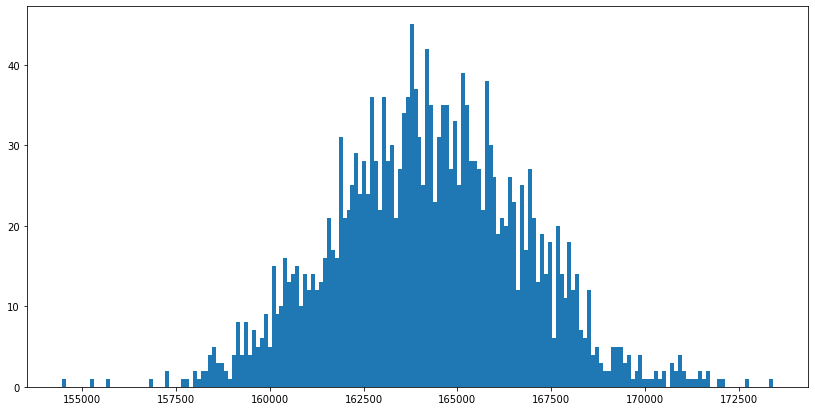

In [26]:
fig=plt.figure(figsize=[14,7])
plt.hist(promedios, bins=180)  
#plt.plot(promedios)    
plt.show()

Y como se puede ver tambien se comporta de forma aproximadamente normaa, con esto demostrado se puede hacer inferencia 
estadistica usando la distribucion normal estandarizada para facilitar el calculo de areas y de la variable z dada
una area.

ESTIMACION PUNTUAL E INTERVALO DE CONFIAZA

Se puede obtener un intervalo de confianza para estimar el parametro poblacional $\mu$ a partir de la media de la distribucion
muestral. Hay que recordar que para obtener una estimacion puntual se necesita el estimador puntual y el margen de error, 
el calculo para el 95% de probabilidad es como sigue:



y en el caso de que el coeficiente de confianza sea mas de 95% se hace la modificacion del valor 1.96.

Y en general el intervalo de confianza se obtiene como sigue:

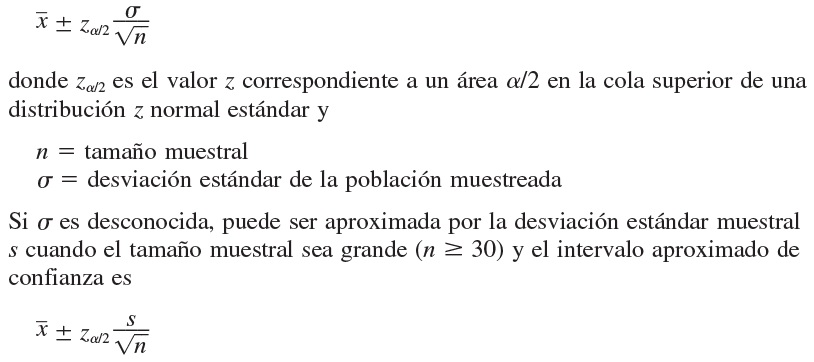

Para el problema presente obtenemos de promediosalmple la estimacion puntual, esta se obtiene con el media de la distribucion muestral de la media.

In [18]:
estimadorM=np.mean(promediosample)
estimadorM

164227.94283166665

error estandar del estimador, se pueden usar muchos valores de margen de error, por ejemplo 95%. con estos datos
el error estandar del estimador es

In [22]:
ES=(norm.ppf(0.975))*(statistics.pstdev(promediosample)/math.sqrt(2000))   #statistics.pstdev es la desviacion estandar de la muestra
ES

129.60197962312898

De esta manera el ointervalo de confianza es:

164227.94  $\pm$ 129.60

Osea que el valor del parametro $\mu$ esta dentro del intervalo [164098.34, 164357.54]